In [468]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

from sklearn.metrics import r2_score

In [469]:
df = pd.read_csv('train.csv')

df

,ID,x-inv,y-inv,force
0,0,-24.234234,-50.0000,117.616636
1,1,21.771772,-49.8999,132.928749
2,2,12.702703,-49.7998,114.418568
3,3,22.792793,-49.6997,130.401770
4,4,-0.150150,-49.5996,123.536669
...,...,...,...,...
995,995,-17.627628,49.5996,127.982542
996,996,29.459459,49.6997,134.262890
997,997,-17.927928,49.7998,129.727233
998,998,-0.090090,49.8999,121.210844


DATA PRE_PROCESSING

In [470]:
df.shape

(1000, 4)

In [471]:
df.isna().sum()

ID       0
x-inv    0
y-inv    0
force    0
dtype: int64

In [472]:
df.duplicated().any()

False

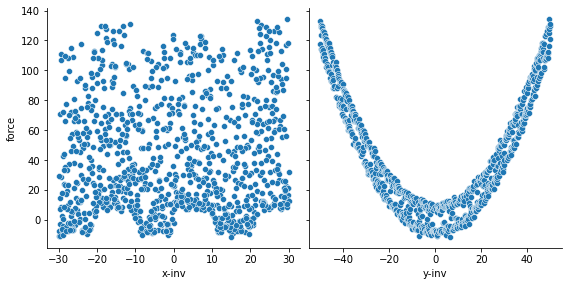

In [473]:
sns.pairplot(df, x_vars = ['x-inv', 'y-inv'], y_vars='force', height = 4, aspect = 1, kind ='scatter')

plt.show()

In [474]:
X = df[['x-inv', 'y-inv']]

Y = df[['force']]

In [475]:
x_train , x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 100)

In [476]:
multiple_regr = LinearRegression()

multiple_regr.fit(x_train, y_train)

LinearRegression()

In [477]:
print(multiple_regr.intercept_)

list(zip(X, multiple_regr.coef_))

[42.4944021]


[('x-inv', array([0.07881008, 0.0276394 ]))]

In [478]:
y_pred = multiple_regr.predict(x_test)

print(format(y_pred))

[[43.12431018]
 [40.56731144]
 [42.9791873 ]
 [40.12474694]
 [43.7544224 ]
 [40.79993658]
 [43.80608647]
 [40.42958533]
 [41.59756895]
 [45.39147102]
 [43.15485767]
 [41.73799466]
 [41.62287155]
 [40.63575658]
 [43.94979526]
 [42.25498135]
 [40.03034339]
 [42.90640142]
 [44.1163136 ]
 [40.74872178]
 [44.56917097]
 [40.88407339]
 [42.91156835]
 [41.08506726]
 [42.18360434]
 [42.67445741]
 [44.28986786]
 [41.68780134]
 [43.83408907]
 [41.77039506]
 [45.6526718 ]
 [39.31633708]
 [41.8917737 ]
 [40.97034198]
 [42.50341187]
 [42.88879456]
 [45.09066395]
 [41.45132572]
 [43.50920744]
 [41.31344972]
 [42.81857367]
 [43.57424051]
 [41.98184134]
 [40.59804981]
 [41.76869164]
 [41.08097406]
 [44.52762376]
 [39.46273502]
 [41.5410321 ]
 [42.32448454]
 [40.4527047 ]
 [41.39396308]
 [39.88387834]
 [42.85287882]
 [41.16100722]
 [41.61716776]
 [41.71829218]
 [44.61655579]
 [44.61492992]
 [43.35187689]
 [40.82443429]
 [40.32145152]
 [42.99048639]
 [43.15026859]
 [44.56412259]
 [41.64481433]
 [39.56863

In [479]:
print('R squared value of the model: {:.2f}'.format(multiple_regr.score(X,Y)*100))

R squared value of the model: 0.17


In [480]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 30.919450145986023
Mean Square Error: 1290.5811000795234
Root Mean Square Error: 35.924658663368305


In [481]:
r2_score(y_test, y_pred)

-0.0009213923809803237

In [482]:
kaggle_df = pd.read_csv('test.csv')

kaggle_df


,ID,x-inv,y-inv
0,0,-8.889889,-50.000000
1,1,-28.355836,-49.989999
2,2,15.682568,-49.979998
3,3,-19.858986,-49.969997
4,4,-22.445245,-49.959996
...,...,...,...
9995,9995,22.211221,49.959996
9996,9996,-4.527453,49.969997
9997,9997,21.515152,49.979998
9998,9998,-18.844884,49.989999


In [483]:
kaggle_test_X = kaggle_df[['x-inv', 'y-inv']]

kaggle_test_Y = kaggle_df[['ID']]

kaggle_test_X

,x-inv,y-inv
0,-8.889889,-50.000000
1,-28.355836,-49.989999
2,15.682568,-49.979998
3,-19.858986,-49.969997
4,-22.445245,-49.959996
...,...,...
9995,22.211221,49.959996
9996,-4.527453,49.969997
9997,21.515152,49.979998
9998,-18.844884,49.989999


In [484]:
kaggle_test_yhat = multiple_regr.predict(kaggle_test_X)

kaggle_df["force"] = kaggle_test_yhat

to_submit = kaggle_df[["ID","force"]]

to_submit.to_csv("submission.csv", index = False)